# Day 25: Addressing Overfitting and Underfitting in Regression Models 
Here's my intro for a lesson on Addressing Overfitting and Underfitting in Regression Models. This is being written in Jupyter Notebook, please enclose LaTeX in dollar signs ($) to work in a notebook's markdown cells.

Strategies to combat overfitting and underfitting in regression. - Math Focus: Bias-variance tradeoff and regularization methods.
- **Theoretical Concepts:**
    - Identifying symptoms of overfitting and underfitting in regression models.
    - Strategies to combat overfitting and underfitting.
- **Mathematical Foundation:**
    - Bias-variance tradeoff.
    - Regularization methods and their mathematical basis.
- **Python Implementation:**
    - Demonstrating overfitting and underfitting using matplotlib.
    - Implementing regularization techniques in Python.
    - Using validation curves and learning curves for model diagnostics.
- **Example Dataset:**
    - A dataset with a clear overfitting/underfitting tendency (e.g., high-dimensional data).
 
Can you please write an introduction paragraph about model fit, how to determine, and provide equations? Please explain all terms. What should readers be able to accomplish by the end of the lesson?

## Introduction

In the realm of machine learning, particularly within regression analysis, achieving an optimal model fit that accurately predicts outcomes without succumbing to the pitfalls of overfitting or underfitting is paramount. Overfitting occurs when a model is too complex, capturing noise instead of the underlying pattern, thereby performing well on training data but poorly on unseen data. Underfitting, conversely, happens when a model is too simplistic to capture underlying patterns, leading to poor performance on both training and new data.

To determine the adequacy of model fit, one must understand the bias-variance tradeoff, encapsulated by the equation: 

$$\text{Total error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error},$$

where:
- **Bias** refers to errors from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **Variance** refers to errors from sensitivity to small fluctuations in the training set. High variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.
- **Irreducible Error** is the error inherent in the problem itself, often due to noise in the data.

To manage these challenges, regularization methods like Ridge ($L_2$ regularization), Lasso ($L_1$ regularization), and Elastic Net are employed, providing mathematical techniques to constrain or penalize the size of the coefficients in regression models, thus helping to reduce overfitting by introducing a penalty term:

- Ridge Regression adds a penalty equal to the square of the magnitude of coefficients ($\alpha \sum_{i=1}^{n} \theta_i^2$).
- Lasso Regression adds a penalty equal to the absolute value of the magnitude of coefficients ($\alpha \sum_{i=1}^{n} |\theta_i|$).
- Elastic Net is a hybrid of Ridge and Lasso, introducing a penalty term that is a linear combination of their penalties.

Consider this variation of the introduction plot from Lesson 23:

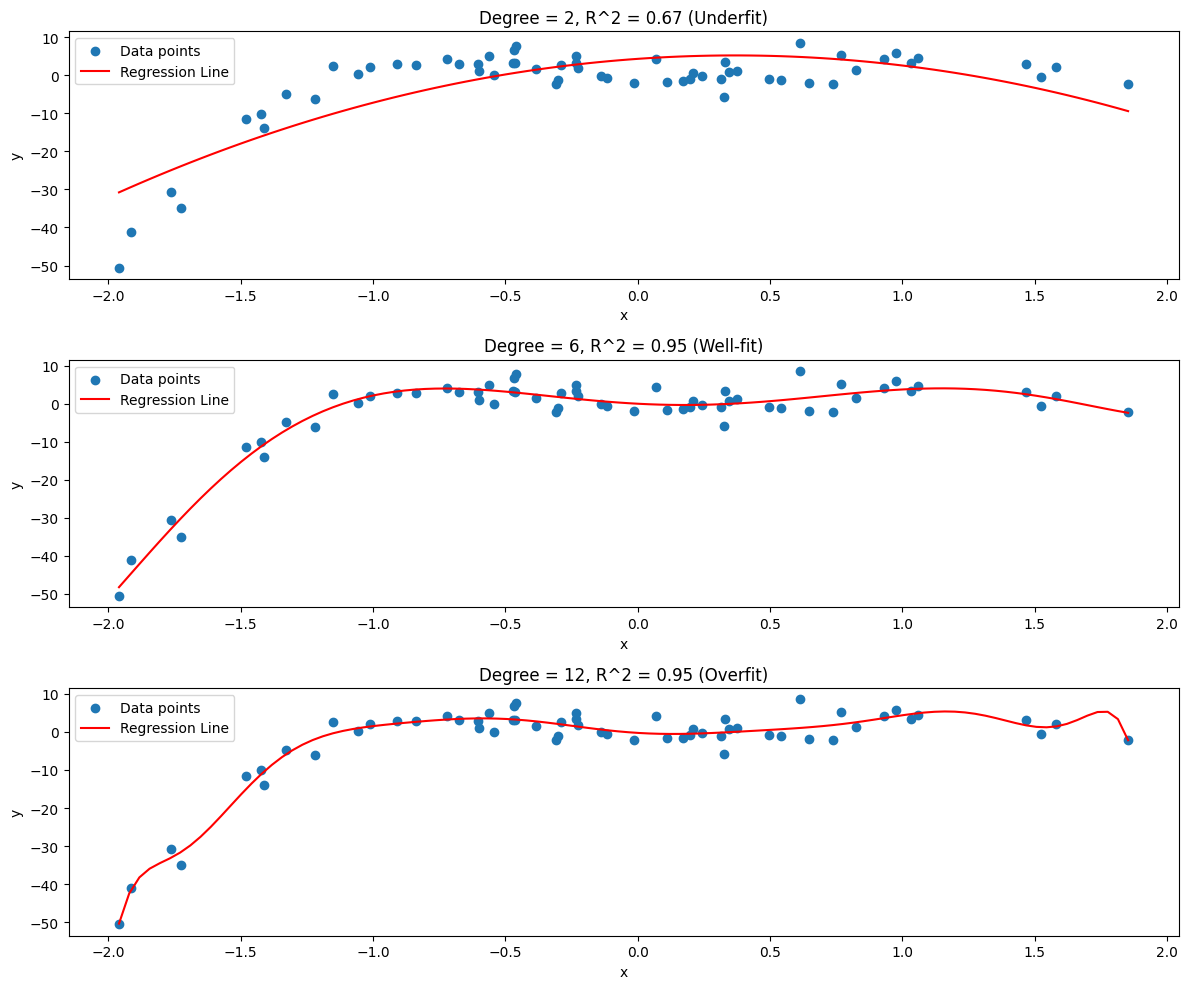

In [57]:
# overview plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 60)

# This is the actual equation, so we could check exactly what coefficients our regression found.
y= -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 3, 60)

# Reshape x for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

regressors = [
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    make_pipeline(PolynomialFeatures(degree=6), LinearRegression()),
    make_pipeline(PolynomialFeatures(degree=12), LinearRegression()),
]

plot_type = ["Underfit", "Well-fit", "Overfit"]

plt.figure(figsize=(12, 10))
for i, reg in enumerate(regressors):
    reg.fit(x, y)

    y_pred = reg.predict(x) # predict datapoints' values to evaluate plot
    
    # Generating points for plotting the regression line
    x_plot = np.linspace(min(x), max(x), 100)
    #X_plot = x_plot[:, np.newaxis]
    y_plot = reg.predict(x_plot)

    r2 = r2_score(y, y_pred)

    # Plotting the data points and the regression line
    plt.subplot(3, 1, i+1)
    plt.scatter(x, y, label='Data points')
    plt.plot(x_plot, y_plot, label='Regression Line', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Degree = {reg["polynomialfeatures"].degree}, R^2 = {r2:.2f} ({plot_type[i]})')
plt.tight_layout()
plt.show()

Since the data is defined by an equation that we can see, we know that the true trend of the data is polynomial with degree three. But if we didn't know that, as is typical with real-world data, how could we determine it?

We have to try different values and evaluate them.

## Bias-Variance Tradeoff

The example above (fitting directly against the entire data) doesn't leave us enough separate data for *validating* our model. It's not enough to just separate our data into **training** (data for fitting the model) and **testing** (data for giving the model a score with data it hasn't seen). We also need a separate **validation** data set to set the hyperparameters of the model. Separating the three sets of data and never mixing them is the best approach, as this prevents your model from overfitting to the data points themselves rather than the trends they represent.

- **Bias** is the error due to overly simplistic assumptions in the learning algorithm. It can lead to underfitting, where the model fails to capture important patterns in the data. The bias of an estimator is defined as the difference between an estimator's expected value and the true value of the parameter being estimated. Mathematically, if $\hat{\theta}$ is an estimator for a parameter $\theta$, the bias is given by $ \text{Bias}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta $.

- **Variance** refers to the error due to too much complexity in the learning algorithm. It can cause overfitting, where the model captures random noise in the training data rather than the intended outputs. Variance is a measure of how much the estimates of the target function will change if different training data was used. The variance of an estimator is defined as the variability of the model prediction for a given data point. Mathematically, it is $ \text{Variance}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2] $.

In essence, **bias** is about the strength of assumptions the model makes, and **variance** is about the model's sensitivity to fluctuations in the training data. The tradeoff is that reducing one of these errors typically increases the other. This is because increasing model complexity (to reduce bias and fit the training data more closely) often leads to increased variance and vice versa. A good model must balance these two types of error to minimize the total error.


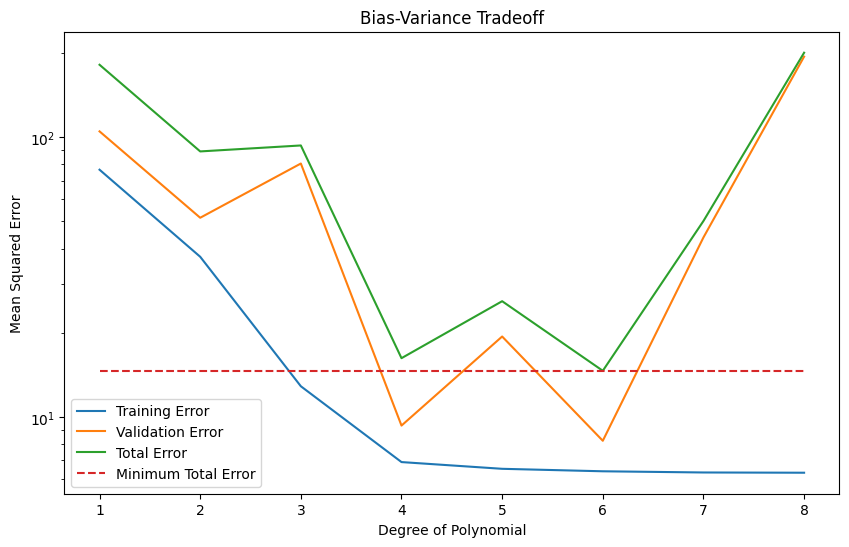

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 60)
y = -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 3, 60)

# Reshape x and y for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Split data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

# Range of polynomial degrees to evaluate
degrees = range(1, 9)

# Prepare to store training and validation errors
train_errors, val_errors = [], []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    model.fit(x_train, y_train)

    # Predict and calculate error on training set
    y_train_pred = model.predict(x_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    # Predict and calculate error on validation set
    y_val_pred = model.predict(x_val)
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plotting the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, val_errors, label='Validation Error')
total_error = [val_errors[i]+train_errors[i] for i in range(len(train_errors))]
plt.plot(degrees, total_error, label='Total Error')
min_error = min(total_error)
plt.plot([1,8], [min_error, min_error], linestyle="dashed", label="Minimum Total Error")
plt.yscale('log') # Log scale can sometimes make it easier to see the differences
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()


The Bias-Variance Tradeoff plot shows that as **model complexity** goes up (increasing degree of polynomial, in this case):

* initially validation error goes down, as the model becomes complex enough to represent the underlying unknown distribution of the data.
* eventually validation error goes up, as the model's complexity allows for overfitting.
* Training error starts high, as the model is not complex enough to represent the trends in the data.
* Training error always continues to get lower, but on its own this is a poor measure of the model's success.

According to this plot, assuming we want to use a simple linear regression with `make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())`, we have tuned the hyperparameter `degree` to 6.

## Regularization

Regularization prevents overfitting by penalizing models that are too complex. It involves adding a penalty to the loss function that the model is trying to minimize. The key idea behind regularization is the principle of Occam's Razor: given two models with similar predictive abilities, the simpler model is preferable. Regularization techniques effectively add a complexity cost to the model training process, thereby encouraging simpler models that generalize better to new, unseen data.

Ridge and Lasso regression, discussed in Lesson 23, are regularization algorithms. Ridge Regression (L2 regularization) adds a penalty equal to the square of the magnitude of coefficients. In Lasso Regression (L1 regularization), the penalty is the absolute value of the coefficients. While Ridge Regression shrinks the coefficients evenly, Lasso Regression can reduce some coefficients to zero, effectively performing feature selection.

Elastic Net regularization emerges as a hybrid of these two approaches, combining the penalties of Ridge and Lasso. This method includes both the L1 and L2 penalties in the loss function, enabling it to inherit properties from both. It can shrink coefficients like Ridge, while also performing feature selection like Lasso. Elastic Net is particularly useful when there are multiple correlated features; Lasso might arbitrarily select one feature among the correlated ones, but Elastic Net is more likely to select a group of correlated features. This blend of Ridge and Lasso makes Elastic Net a versatile tool, especially in scenarios where the data includes multiple features that are correlated or when the scale of the solution is not well-defined.

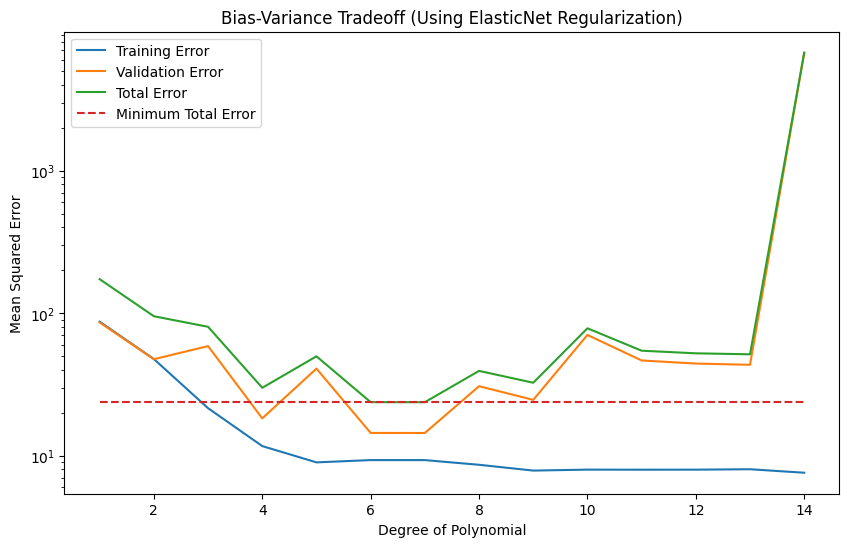

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 60)
y = -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 3, 60)

# Reshape x and y for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Split data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

# Range of polynomial degrees to evaluate
degrees = range(1, 15)

# Prepare to store training and validation errors
train_errors, val_errors = [], []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree=degree), ElasticNet(random_state=42, max_iter=200_000))
    model.fit(x_train, y_train)

    # Predict and calculate error on training set
    y_train_pred = model.predict(x_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))

    # Predict and calculate error on validation set
    y_val_pred = model.predict(x_val)
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Plotting the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, val_errors, label='Validation Error')
total_error = [val_errors[i]+train_errors[i] for i in range(len(train_errors))]
plt.plot(degrees, total_error, label='Total Error')
min_error = min(total_error)
plt.plot([1,14], [min_error, min_error], linestyle="dashed", label="Minimum Total Error")
plt.yscale('log') # Log scale can sometimes make it easier to see the differences
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff (Using ElasticNet Regularization)')
plt.legend()
plt.show()


Some interesting similarities and differences between this plot and the previous one:

* The degree of the polynomial still looks to be 6, but 7 now matches as well.
* The validation error rises much more slowly. ElasticNet, like Lasso, has the capability to zero out coefficients, so some of the extra degrees of freedom may be disabled internally.

## Exercise For The Reader

Have a look at your solutions using the `diabetes` and `housing` datasets from the previous lessons, and evaluate your hyperparameter selection with polynomial degree vs. error plots.

* Were your selections optimal?
* Could using a plot like this streamline your process to come up with an initial model?

Have fun!

## Additional Resources

-   **Resource 1:** [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) (Comprehensive guide on the concepts of overfitting and underfitting in machine learning models)
-   **Resource 2:** [Dealing with Overfitting and Underfitting in Python](https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting) (Practical guide on addressing overfitting and underfitting in regression models)